## Uppgift a) - Träna en ANN-modell på MNIST-datan

Vi ska nu bygga och träna ett artificiellt neuralt nätverk (ANN) på MNIST-datan för att klassificera handskrivna siffror.

In [2]:
# Importera alla nödvändiga bibliotek
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential

# Ladda MNIST-data
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
X = mnist["data"]
y = mnist["target"].astype(np.uint8)

print(f"Data laddat: X shape = {X.shape}, y shape = {y.shape}")

Data laddat: X shape = (70000, 784), y shape = (70000,)


In [3]:
# Förbered data för ANN
# Skapa train/val/test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y,
                                                                              test_size=0.2, 
                                                                              random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                                    y_train_val, 
                                                                    test_size=0.2, 
                                                                    random_state=42)

# Normalisera data (0-1 istället för 0-255) ( gör det snabbare att träna)
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# Konvertera labels till one-hot encoding ( vi gör om det till (10) så ANN output blir 10)
y_train_categorical = to_categorical(y_train, 10)
y_val_categorical = to_categorical(y_val, 10)
y_test_categorical = to_categorical(y_test, 10)

print(f"Träningsdata shape: {X_train.shape}")
print(f"Valideringsdata shape: {X_val.shape}")
print(f"Testdata shape: {X_test.shape}")

Träningsdata shape: (44800, 784)
Valideringsdata shape: (11200, 784)
Testdata shape: (14000, 784)


In [4]:
# Bygga ANN-modell
n_cols = X_train.shape[1]  # Antal pixels i MNIST-bildern (28x28)

model = Sequential()
model.add(layers.Input(shape=(n_cols,)))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(50, activation='relu'))
#Output ( output blir 10 för vi converatade från labels till categorical )
model.add(layers.Dense(10, activation='softmax'))

# Kompilera modellen ( adam är den mest använda optimizern ) ( CategoricalCrossentropy för multi-klass klassificering + vi gjorde om labels till categorical )
model.compile(
    optimizer='adam',
    loss='CategoricalCrossentropy',
    metrics=['accuracy']
)

# Visa modellarkitektur
print("\nModellarkitektur:")
model.summary()


Modellarkitektur:


Model: "sequential"


Modellarkitektur:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,060 (328.36 KB)

 Trainable params: 84,060 (328.36 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Träna modellen
history = model.fit(
    X_train, y_train_categorical,
    validation_split=0.2,
    epochs=20,
    validation_data=(X_val, y_val_categorical),
    verbose=1
)

Epoch 1/20
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9179 - loss: 0.2819 - val_accuracy: 0.9546 - val_loss: 0.1543
Epoch 2/20
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9637 - loss: 0.1206 - val_accuracy: 0.9600 - val_loss: 0.1254
Epoch 3/20
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9732 - loss: 0.0846 - val_accuracy: 0.9688 - val_loss: 0.1038
Epoch 4/20
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9791 - loss: 0.0637 - val_accuracy: 0.9719 - val_loss: 0.0939
Epoch 5/20
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9830 - loss: 0.0524 - val_accuracy: 0.9727 - val_loss: 0.0938
Epoch 6/20
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9876 - loss: 0.0384 - val_accuracy: 0.9754 - val_loss: 0.0880
Epoch 7/20
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9896 - loss: 0.0319 - val_accuracy: 0.9715 - val_loss: 0.1061
Epoch 8/20
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9904 - loss: 0.028

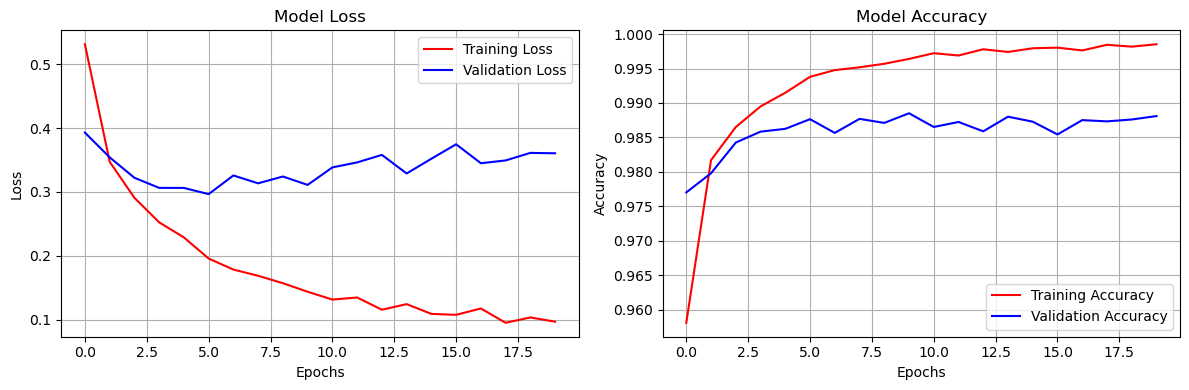

In [6]:
# Visualisera träning - loss och accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Loss
plt.sca(ax1)
plt.plot(np.sqrt(history.history['loss']), 'r', label='Training Loss')
plt.plot(np.sqrt(history.history['val_loss']), 'b', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True)

# Accuracy
plt.sca(ax2)
plt.plot(np.sqrt(history.history['accuracy']), 'r', label='Training Accuracy')
plt.plot(np.sqrt(history.history['val_accuracy']), 'b', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [7]:
# Evaluera modellen på testdata
print("RESULTAT AV ANN-MODELL PÅ MNIST")

# Test accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test_categorical, verbose=0)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Validerings accuracy
val_loss, val_accuracy = model.evaluate(X_val, y_val_categorical, verbose=0)
print(f"\nValidering Loss: {val_loss:.4f}")
print(f"Validering Accuracy: {val_accuracy:.4f} ({val_accuracy*100:.2f}%)")

# Tränings accuracy (sista Epochen)
train_accuracy_final = history.history['accuracy'][-1]
print(f"\nTränings Accuracy (sista Epochen): {train_accuracy_final:.4f} ({train_accuracy_final*100:.2f}%)")

# Detaljerad klassificering
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\n" + "-"*25)
print("KLASSIFICERINGSRAPPORT:")
print(classification_report(y_test, y_pred_classes))

RESULTAT AV ANN-MODELL PÅ MNIST

Test Loss: 0.1526
Test Accuracy: 0.9731 (97.31%)

Validering Loss: 0.1299
Validering Accuracy: 0.9763 (97.63%)

Tränings Accuracy (sista Epochen): 0.9971 (99.71%)
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

-------------------------
KLASSIFICERINGSRAPPORT:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1343
           1       0.98      0.99      0.99      1600
           2       0.98      0.96      0.97      1380
           3       0.98      0.97      0.97      1433
           4       0.95      0.98      0.97      1295
           5       0.97      0.97      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.98      0.97      0.97      1503
           8       0.95      0.98      0.96      1357
           9       0.97      0.95      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted

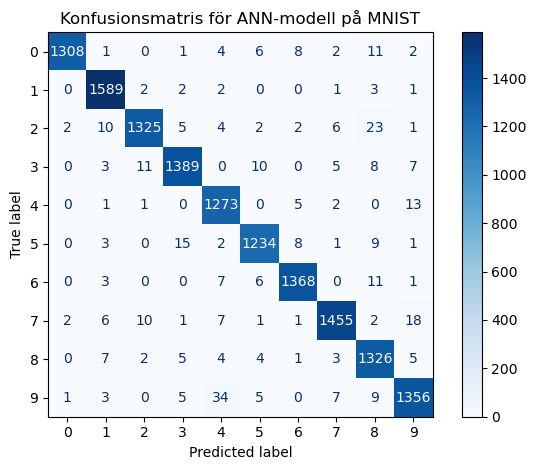


Total antal korrekta klassificeringar: 13623 av 14000


In [8]:
# Konfusionsmatris för ANN
cm = confusion_matrix(y_test, y_pred_classes)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title("Konfusionsmatris för ANN-modell på MNIST")
plt.tight_layout()
plt.show()

print(f"\nTotal antal korrekta klassificeringar: {(y_pred_classes == y_test).sum()} av {len(y_test)}")